#PUC Minas - Pontifícia Universidade Católica de Minas Gerais

##Pós-Graduação em Ciência de Dados e Big Data

TRABALHO DE CONCLUSÃO DE CURSO

**ESTUDO SOBRE O CONSUMO DE MEDICAMENTOS EM UM HOSPITAL NO RIO GRANDE DO SUL **

Aluna: Tainara Guadagnin Marcon

Este notebook é referente aos códigos elaborados em Python e utilizados no Trabalho de Conclusão de Curso em Ciência de Dados e Big Data da Pós-Graduação da PUC Minas, especificamente para a criação dos modelos de Machine Learning.

#Importação de bibliotecas

In [ ]:
!pip -q install yellowbrick
!pip -q install plotly --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 14.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot
import plotly.express as px

#Coleta de dados

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
consumo_med = pd.read_excel('/content/drive/My Drive/TCC_Ciência_de_Dados_e_Big_Data/Consumo_de_medicamentos_2019.xlsx')

In [ ]:
consumo_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613 entries, 0 to 2612
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MÊS              2613 non-null   float64
 1   CENTRO DE CUSTO  2613 non-null   object 
 2   CONTA CONTÁBIL   2613 non-null   object 
 3   MEDICAMENTO      2613 non-null   object 
 4   ESTABELECIMENTO  2613 non-null   object 
 5   DEPÓSITO         2613 non-null   object 
 6   CONSUMO          2613 non-null   float64
 7   TIPO CONSUMO     2613 non-null   object 
dtypes: float64(2), object(6)
memory usage: 163.4+ KB


In [ ]:
consumo_med.shape

(2613, 8)

In [ ]:
consumo_med.head(5)

,MÊS,CENTRO DE CUSTO,CONTA CONTÁBIL,MEDICAMENTO,ESTABELECIMENTO,DEPÓSITO,CONSUMO,TIPO CONSUMO
0,4.0,520433 - Pronto Atendimento,4421190122101 - MEDICAMENTOS HOSPITALARES,ANALGESICOS,HOSPITAL,FARMACIA CENTRAL,1388.0,Moderado
1,4.0,520433 - Pronto Atendimento,4421190122101 - MEDICAMENTOS HOSPITALARES,ANESTESICOS,HOSPITAL,FARMACIA CENTRAL,214.0,Baixo
2,4.0,520433 - Pronto Atendimento,4421190122101 - MEDICAMENTOS HOSPITALARES,ANTIBACTERIANOS,HOSPITAL,FARMACIA CENTRAL,174.0,Baixo
3,4.0,520433 - Pronto Atendimento,4421190122101 - MEDICAMENTOS HOSPITALARES,ANTIDOTOS,HOSPITAL,FARMACIA CENTRAL,17.0,Baixo
4,4.0,520433 - Pronto Atendimento,4421190122101 - MEDICAMENTOS HOSPITALARES,ANTIFUNGICOS,HOSPITAL,FARMACIA CENTRAL,1.0,Baixo


Para enriquecimento dos dados foi utilizada outra planilha em excel de outro setor da instituição chamado de setor de internação. Essa planilha contempla a quantidade de pacientes internados por mês e por área hospitalar.

In [ ]:
pacientes = pd.read_excel('/content/drive/My Drive/TCC_Ciência_de_Dados_e_Big_Data/Qtde_pacientes_2019.xlsx')

In [ ]:
pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Ano                                       156 non-null    float64
 1   Mês                                       156 non-null    object 
 2   Unidade de Atendimento                    156 non-null    object 
 3   Quantidade Total de Pacientes Internados  156 non-null    float64
dtypes: float64(2), object(2)
memory usage: 5.0+ KB


In [ ]:
pacientes.shape

(156, 4)

In [ ]:
pacientes.head(5)

,Ano,Mês,Unidade de Atendimento,Quantidade Total de Pacientes Internados
0,2019.0,Jan,520433 - Pronto Atendimento,6729.0
1,2019.0,Fev,520433 - Pronto Atendimento,6228.0
2,2019.0,Mar,520433 - Pronto Atendimento,7187.0
3,2019.0,Abr,520433 - Pronto Atendimento,6847.0
4,2019.0,Mai,520433 - Pronto Atendimento,7220.0


#Tratamento de dados

In [ ]:
#Eliminando colunas desnecessárias 
consumo_med = consumo_med.drop(['CONTA CONTÁBIL', 'ESTABELECIMENTO', 'DEPÓSITO'], axis = 1)
consumo_med.head(5)

In [ ]:
#Renomeando as colunas
consumo_med = consumo_med.rename(columns={'MÊS':'Mes','CENTRO DE CUSTO':'Setor',
                                          'MEDICAMENTO':'Tipo_medicamento',
                                          'CONSUMO':'Qtde_consumida', 'TIPO CONSUMO':'Classificacao'})

In [ ]:
consumo_med.head(5)

In [ ]:
consumo_med.isnull().sum()

In [ ]:
#Renomeando as colunas base pacientes
pacientes = pacientes.rename(columns={'Mês':'Mes',
                        'Unidade de Atendimento': 'Setor',
                        'Quantidade Total de Pacientes Internados': 'Qtde_pacientes'})

In [ ]:
pacientes.head(1)

In [ ]:
pacientes.isnull().sum()

In [ ]:
#Para juntar os dois datasets
consumo_medicamentos = pd.merge(consumo_med, pacientes, on='Setor')
consumo_medicamentos.head(5)

In [ ]:
#Eliminando as colunas duplicadas
consumo_medicamentos = consumo_medicamentos.drop(['Ano','Mes_y'], axis = 1)

In [ ]:
#Renomeando as colunas base final
consumo_medicamentos = consumo_medicamentos.rename(columns={'Mes_x':'Mes'})

In [ ]:
#Alterando a ordem das colunas
consumo_medicamentos = consumo_medicamentos[['Mes','Setor','Tipo_medicamento','Qtde_pacientes','Qtde_consumida','Classificacao']]

#Análise exploratória

In [ ]:
#Tabela do somatório da quantidade de medicamentos consumidos por setor
table = consumo_medicamentos.groupby('Setor')['Qtde_consumida'].sum().reset_index()

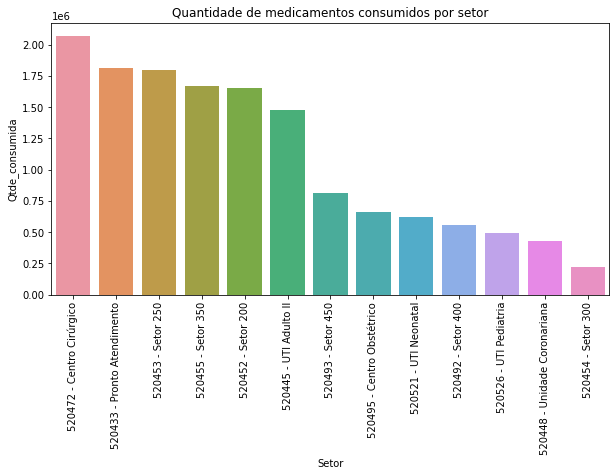

In [ ]:
#Gráfico do somatório da quantidade de medicamentos consumidos por setor
grafico = table.sort_values('Qtde_consumida', ascending = False)
plt.rcParams['figure.figsize'] = 10,5
plt.xticks(rotation=90)
plt.title('Quantidade de medicamentos consumidos por setor')
sns.barplot(data=grafico, x='Setor', y='Qtde_consumida')

In [ ]:
#Tabela do somatório da quantidade de pacientes atendidos por setor
table2 = consumo_medicamentos.groupby(['Setor'])['Qtde_pacientes'].mean().reset_index()
table2 = table2.sort_values('Qtde_pacientes', ascending=False)
table2

,Setor,Qtde_pacientes
0,520433 - Pronto Atendimento,6958.166667
7,520472 - Centro Cirúrgico,1338.083333
4,520453 - Setor 250,499.833333
6,520455 - Setor 350,477.583333
3,520452 - Setor 200,458.833333
9,520493 - Setor 450,284.166667
8,520492 - Setor 400,224.583333
1,520445 - UTI Adulto II,180.750000
11,520521 - UTI Neonatal,178.000000
10,520495 - Centro Obstétrico,151.833333


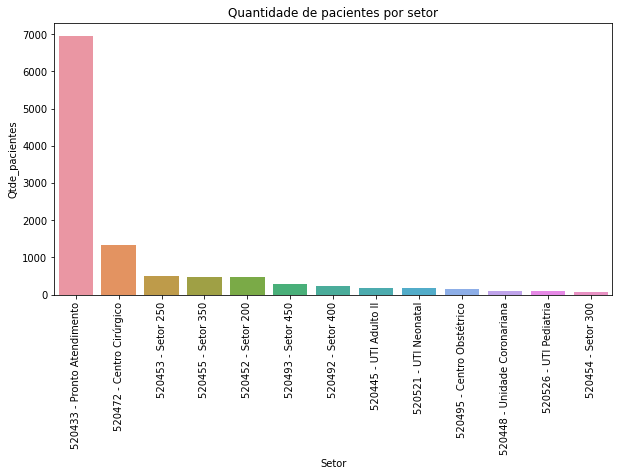

In [ ]:
#Gráfico do somatório da quantidade de pacientes atendidos por setor
plt.rcParams['figure.figsize'] = 10,5
plt.xticks(rotation=90)
plt.title('Quantidade de pacientes por setor')
sns.barplot(data=table2, x='Setor', y='Qtde_pacientes')

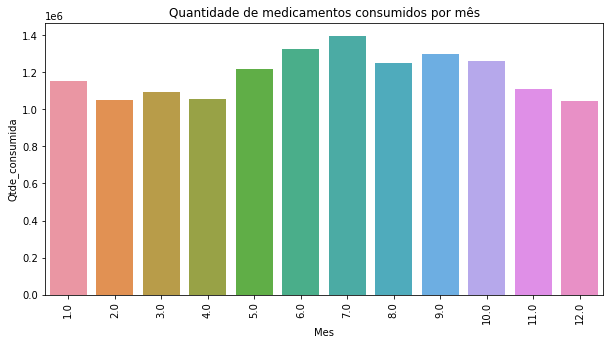

In [ ]:
#Gráfico da quantidade de medicamentos consumidos por mês
grafico3 = consumo_medicamentos.groupby('Mes')['Qtde_consumida'].sum().reset_index()
plt.rcParams['figure.figsize'] = 10,5
plt.xticks(rotation=90)
plt.title('Quantidade de medicamentos consumidos por mês')
sns.barplot(data=grafico3, x='Mes', y='Qtde_consumida')

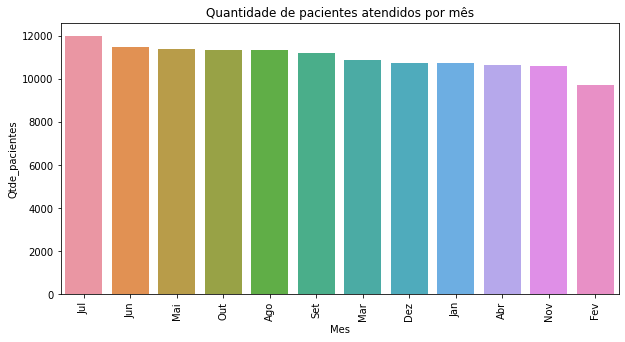

In [ ]:
#Gráfico da quantidade de pacientes atendidos por mês
grafico4 = pacientes.groupby('Mes')['Qtde_pacientes'].sum().reset_index()
grafico4 = grafico4.sort_values('Qtde_pacientes', ascending=False)
plt.rcParams['figure.figsize'] = 10,5
plt.xticks(rotation=90)
plt.title('Quantidade de pacientes atendidos por mês')
sns.barplot(data=grafico4, x='Mes', y='Qtde_pacientes')

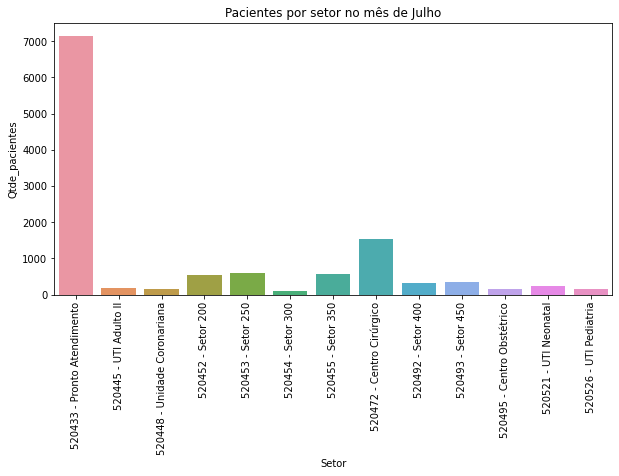

In [ ]:
#Pacientes por setor no mês de Julho                                                   
grafico4 = pacientes.loc[(pacientes['Mes'] == 'Jul')]
grafico4 = grafico4.groupby('Setor')['Qtde_pacientes'].sum().reset_index()
plt.rcParams['figure.figsize'] = 10,5
plt.xticks(rotation=90)
plt.title('Pacientes por setor no mês de Julho')
sns.barplot(data=grafico4, x='Setor', y='Qtde_pacientes')

In [ ]:
#Tabela quantidade de medicamentos consumidos 
table_med= consumo_medicamentos.groupby('Tipo_medicamento')['Qtde_consumida'].sum().reset_index()
table_med

,Tipo_medicamento,Qtde_consumida
0,ANALGESICOS,1.736844e+06
1,ANESTESICOS,4.311070e+05
2,ANTIBACTERIANOS,1.020972e+06
3,ANTIDOTOS,1.690800e+04
4,ANTIFUNGICOS,1.581600e+04
5,ANTIINFLAMATORIOS,6.501480e+05
6,ANTIPARASITARIOS,7.155600e+04
7,ANTIVIRAIS,1.828800e+04
8,DIETAS,1.767120e+05
9,IMUNOSSUPRESSORES E IMUNOTERAP,8.100000e+03


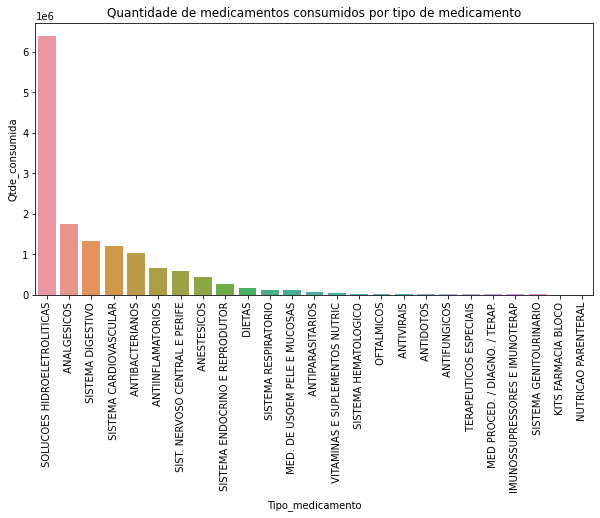

In [ ]:
#Gráfico quantidade de medicamentos consumidos por tipo de medicamento
grafico_med = table_med.sort_values('Qtde_consumida', ascending = False)
plt.rcParams['figure.figsize'] = 10,5
plt.xticks(rotation=90)
plt.title('Quantidade de medicamentos consumidos por tipo de medicamento')
sns.barplot(data=grafico_med, x='Tipo_medicamento', y='Qtde_consumida')

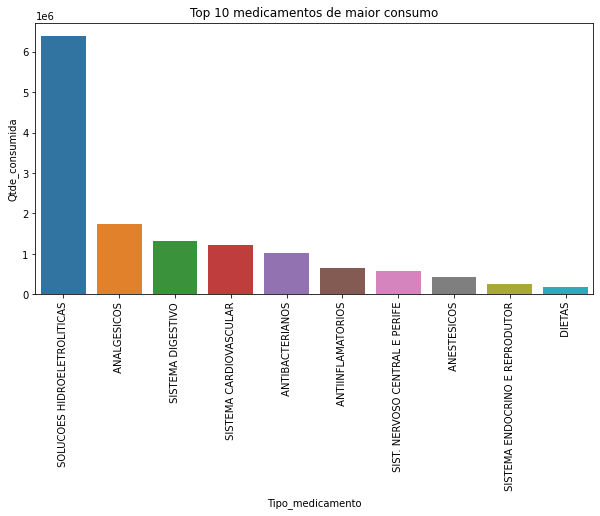

In [ ]:
#Gráfico top 10 medicamentos de maior consumo
grafico_med = table_med.sort_values('Qtde_consumida', ascending = False).head(10)
plt.rcParams['figure.figsize'] = 10,5
plt.xticks(rotation=90)
plt.title('Top 10 medicamentos de maior consumo')
sns.barplot(data=grafico_med, x='Tipo_medicamento', y='Qtde_consumida')

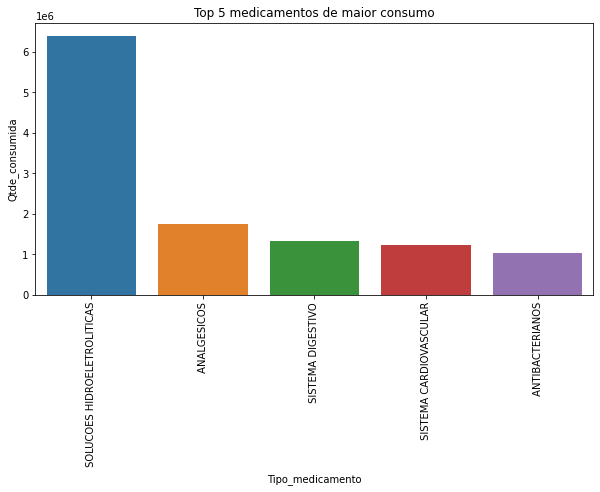

In [ ]:
#Gráfico top 5 medicamentos de maior consumo
grafico_med = table_med.sort_values('Qtde_consumida', ascending = False).head(5)
plt.rcParams['figure.figsize'] = 10,5
plt.xticks(rotation=90)
plt.title('Top 5 medicamentos de maior consumo')
sns.barplot(data=grafico_med, x='Tipo_medicamento', y='Qtde_consumida')

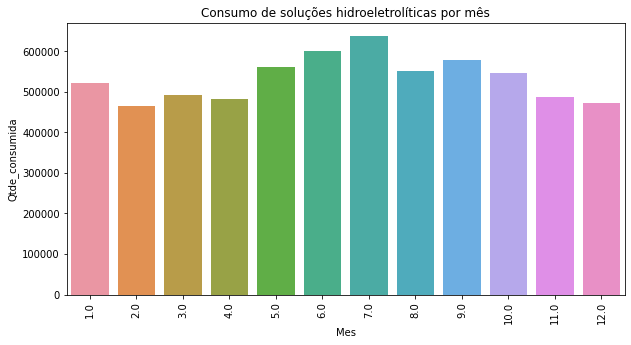

In [ ]:
#Gráfico consumo de soluções hidroeletrolíticas por mês
hidro_1 = consumo_medicamentos.loc[(consumo_medicamentos['Tipo_medicamento'] == ' SOLUCOES HIDROELETROLITICAS')]
hidro = hidro_1.groupby('Mes')['Qtde_consumida'].sum().reset_index()
grafico_hidro = hidro.sort_values('Qtde_consumida', ascending = False)
plt.rcParams['figure.figsize'] = 10,5
plt.xticks(rotation=90)
plt.title('Consumo de soluções hidroeletrolíticas por mês')
sns.barplot(data=grafico_hidro, x='Mes', y='Qtde_consumida')

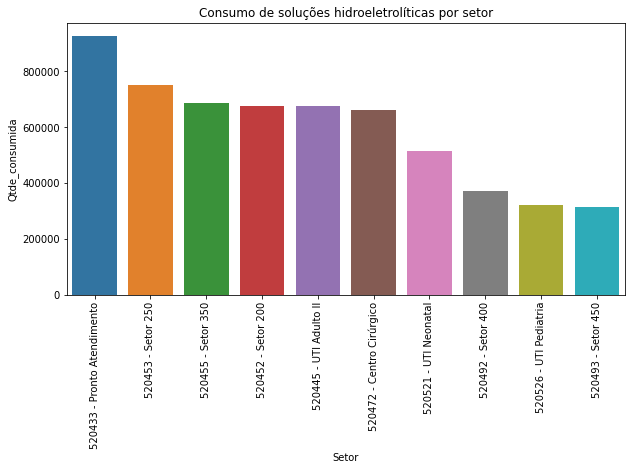

In [ ]:
#Gráfico consumo de soluções hidroeletrolíticas por setor
hidro_2 = consumo_medicamentos.loc[(consumo_medicamentos['Tipo_medicamento'] == ' SOLUCOES HIDROELETROLITICAS')]
hidro = hidro_2.groupby('Setor')['Qtde_consumida'].sum().reset_index()
grafico_hidro = hidro.sort_values('Qtde_consumida', ascending = False).head(10)
plt.rcParams['figure.figsize'] = 10,5
plt.xticks(rotation=90)
plt.title('Consumo de soluções hidroeletrolíticas por setor')
sns.barplot(data=grafico_hidro, x='Setor', y='Qtde_consumida')

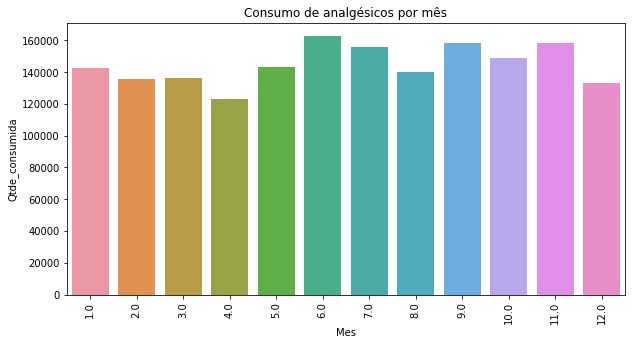

In [ ]:
#Gráfico consumo de analgésicos por mês
analgesicos_1 = consumo_medicamentos.loc[(consumo_medicamentos['Tipo_medicamento'] == ' ANALGESICOS')]
analgesicos = analgesicos_1.groupby('Mes')['Qtde_consumida'].sum().reset_index()
grafico_analgesicos = analgesicos.sort_values('Qtde_consumida', ascending = False)
plt.rcParams['figure.figsize'] = 10,5
plt.xticks(rotation=90)
plt.title('Consumo de analgésicos por mês')
sns.barplot(data=grafico_analgesicos, x='Mes', y='Qtde_consumida')

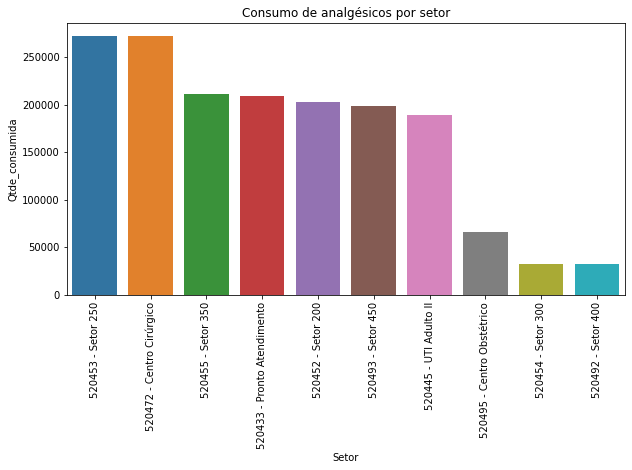

In [ ]:
#Gráfico consumo de analgésicos por setor
analgesicos_2 = consumo_medicamentos.loc[(consumo_medicamentos['Tipo_medicamento'] == ' ANALGESICOS')]
analgesicos = analgesicos_2.groupby('Setor')['Qtde_consumida'].sum().reset_index()
grafico_analgesicos = analgesicos.sort_values('Qtde_consumida', ascending = False).head(10)
plt.rcParams['figure.figsize'] = 10,5
plt.xticks(rotation=90)
plt.title('Consumo de analgésicos por setor')
sns.barplot(data=grafico_analgesicos, x='Setor', y='Qtde_consumida')

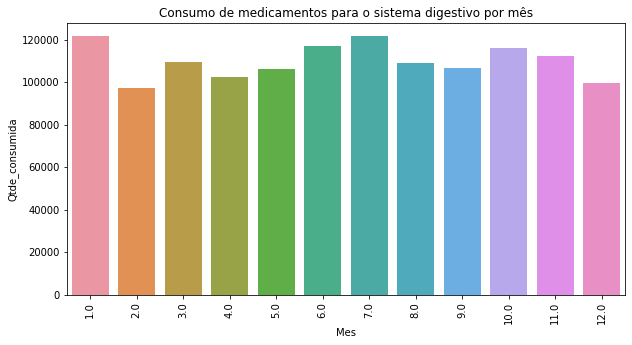

In [ ]:
#Gráfico consumo de medicamentos para o sistema digestivo por mês
digestivo_1 = consumo_medicamentos.loc[(consumo_medicamentos['Tipo_medicamento'] == ' SISTEMA DIGESTIVO')]
digestivo = digestivo_1.groupby('Mes')['Qtde_consumida'].sum().reset_index()
grafico_digestivo = digestivo.sort_values('Qtde_consumida', ascending = False)
plt.rcParams['figure.figsize'] = 10,5
plt.xticks(rotation=90)
plt.title('Consumo de medicamentos para o sistema digestivo por mês')
sns.barplot(data=grafico_digestivo, x='Mes', y='Qtde_consumida')

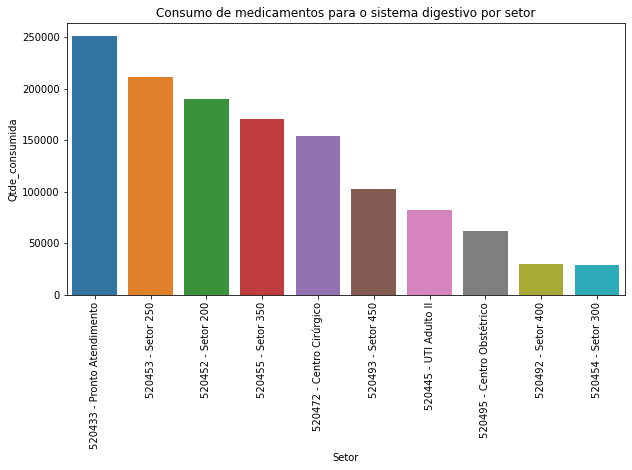

In [ ]:
#Gráfico consumo de medicamentos para o sistema digestivo por setor
digestivo_2 = consumo_medicamentos.loc[(consumo_medicamentos['Tipo_medicamento'] == ' SISTEMA DIGESTIVO')]
digestivo = digestivo_2.groupby('Setor')['Qtde_consumida'].sum().reset_index()
grafico_digestivo = digestivo.sort_values('Qtde_consumida', ascending = False).head(10)
plt.rcParams['figure.figsize'] = 10,5
plt.xticks(rotation=90)
plt.title('Consumo de medicamentos para o sistema digestivo por setor')
sns.barplot(data=grafico_digestivo, x='Setor', y='Qtde_consumida')

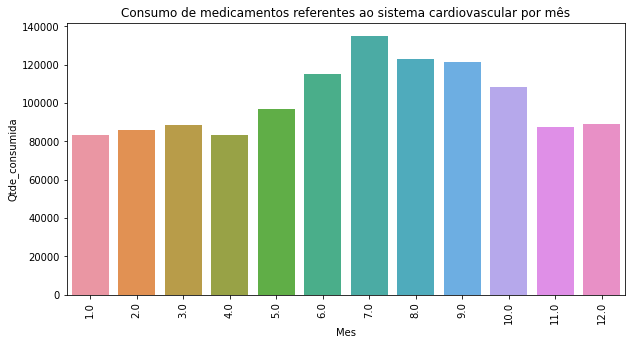

In [ ]:
#Gráfico consumo de medicamentos referentes ao sistema cardiovascular por mês
cardio_1 = consumo_medicamentos.loc[(consumo_medicamentos['Tipo_medicamento'] == ' SISTEMA CARDIOVASCULAR')]
cardio = cardio_1.groupby('Mes')['Qtde_consumida'].sum().reset_index()
grafico_cardio = cardio.sort_values('Qtde_consumida', ascending = False)
plt.rcParams['figure.figsize'] = 10,5
plt.xticks(rotation=90)
plt.title('Consumo de medicamentos referentes ao sistema cardiovascular por mês')
sns.barplot(data=grafico_cardio, x='Mes', y='Qtde_consumida')

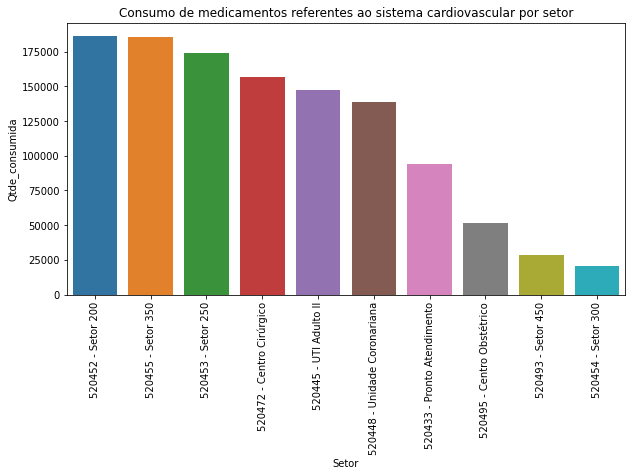

In [ ]:
#Gráfico consumo de medicamentos referentes ao sistema cardiovascular por setor
cardio_2 = consumo_medicamentos.loc[(consumo_medicamentos['Tipo_medicamento'] == ' SISTEMA CARDIOVASCULAR')]
cardio = cardio_2.groupby('Setor')['Qtde_consumida'].sum().reset_index()
grafico_cardio = cardio.sort_values('Qtde_consumida', ascending = False).head(10)
plt.rcParams['figure.figsize'] = 10,5
plt.xticks(rotation=90)
plt.title('Consumo de medicamentos referentes ao sistema cardiovascular por setor')
sns.barplot(data=grafico_cardio, x='Setor', y='Qtde_consumida')

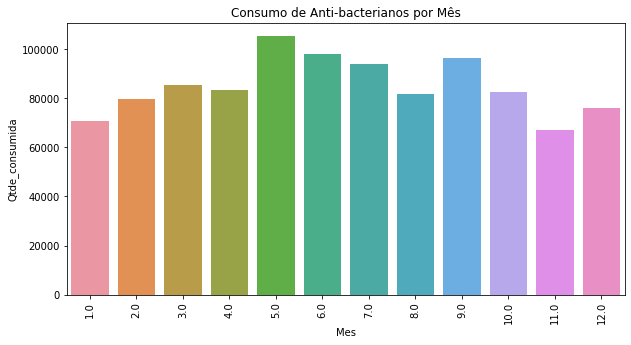

In [ ]:
#Gráfico consumo de anti bacterianos por mês
antibacterianos_1 = consumo_medicamentos.loc[(consumo_medicamentos['Tipo_medicamento'] == ' ANTIBACTERIANOS')]
antibacterianos = antibacterianos_1.groupby('Mes')['Qtde_consumida'].sum().reset_index()
grafico_antibacterianos = antibacterianos.sort_values('Qtde_consumida', ascending = False)
plt.rcParams['figure.figsize'] = 10,5
plt.xticks(rotation=90)
plt.title('Consumo de Anti-bacterianos por Mês')
sns.barplot(data=grafico_antibacterianos, x='Mes', y='Qtde_consumida')

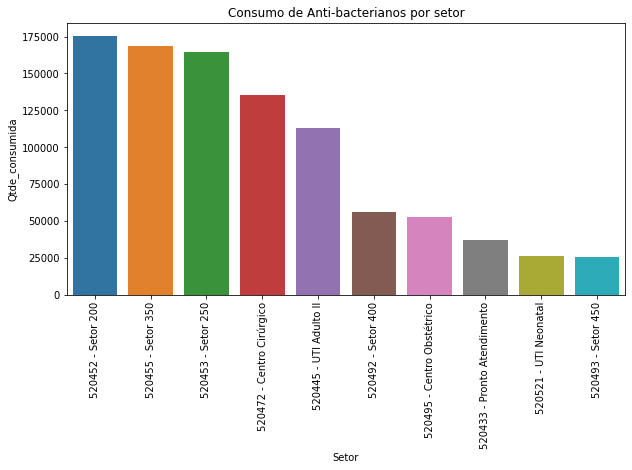

In [ ]:
#Gráfico consumo de anti bacterianos por setor
antibacterianos_2 = consumo_medicamentos.loc[(consumo_medicamentos['Tipo_medicamento'] == ' ANTIBACTERIANOS')]
antibacterianos = antibacterianos_2.groupby('Setor')['Qtde_consumida'].sum().reset_index()
grafico_antibacterianos = antibacterianos.sort_values('Qtde_consumida', ascending = False).head(10)
plt.rcParams['figure.figsize'] = 10,5
plt.xticks(rotation=90)
plt.title('Consumo de Anti-bacterianos por setor')
sns.barplot(data=grafico_antibacterianos, x='Setor', y='Qtde_consumida')

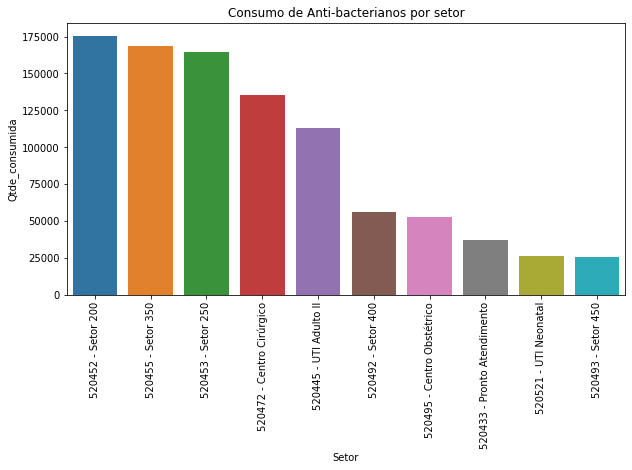

In [ ]:
#Gráfico consumo de anti bacterianos por setor
antibacterianos_2 = consumo_medicamentos.loc[(consumo_medicamentos['Tipo_medicamento'] == ' ANTIBACTERIANOS')]
antibacterianos = antibacterianos_2.groupby('Setor')['Qtde_consumida'].sum().reset_index()
grafico_antibacterianos = antibacterianos.sort_values('Qtde_consumida', ascending = False).head(10)
plt.rcParams['figure.figsize'] = 10,5
plt.xticks(rotation=90)
plt.title('Consumo de Anti-bacterianos por setor')
sns.barplot(data=grafico_antibacterianos, x='Setor', y='Qtde_consumida')

#Preparação de dados

##Divisão entre previsores e classe

In [ ]:
consumo_medicamentos.columns

In [ ]:
x_consumo = consumo_medicamentos.iloc[:, 0:5].values
x_consumo[0]

In [ ]:
y_consumo = consumo_medicamentos.iloc[:,5].values
y_consumo[0]

##Tratamento de atributos categóricos

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
label_encoder_Mes = LabelEncoder()
label_encoder_Setor = LabelEncoder()
label_encoder_Tipo_medicamento = LabelEncoder()

In [ ]:
x_consumo[:,0] = label_encoder_Mes.fit_transform(x_consumo[:,0])
x_consumo[:,1] = label_encoder_Setor.fit_transform(x_consumo[:,1])
x_consumo[:,2] = label_encoder_Tipo_medicamento.fit_transform(x_consumo[:,2])

##Escalonamento dos valores

In [ ]:
x_consumo

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler_x_consumo = StandardScaler(with_mean=False) 
x_consumo = scaler_x_consumo.fit_transform(x_consumo)

In [ ]:
x_consumo

##Divisão das bases em treinamento e testes

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_consumo_treinamento, x_consumo_teste, y_consumo_treinamento, y_consumo_teste = train_test_split(x_consumo, y_consumo, test_size = 0.25, random_state = 0)

#Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive_consumo = GaussianNB()
naive_consumo.fit(x_consumo_treinamento, y_consumo_treinamento)
previsoes_naive = naive_consumo.predict(x_consumo_teste)
previsoes_naive

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_consumo_teste, previsoes_naive)

0.9788238295700983

0.9788238295700983

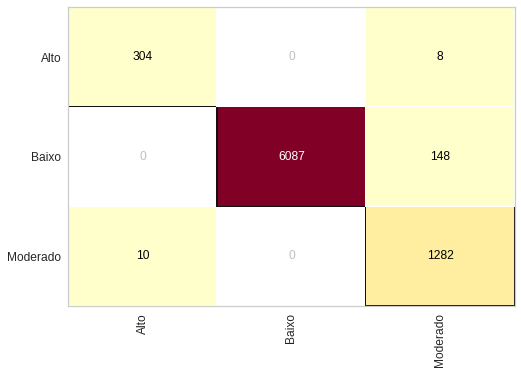

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(naive_consumo)
cm.fit(x_consumo_treinamento, y_consumo_treinamento)
cm.score(x_consumo_teste, y_consumo_teste)

In [ ]:
print(classification_report(y_consumo_teste, previsoes_naive))

              precision    recall  f1-score   support

        Alto       0.97      0.97      0.97       312
       Baixo       1.00      0.98      0.99      6235
    Moderado       0.89      0.99      0.94      1292

    accuracy                           0.98      7839
   macro avg       0.95      0.98      0.97      7839
weighted avg       0.98      0.98      0.98      7839



#Redes Neurais

In [ ]:
x_consumo_treinamento.shape

(23517, 5)

In [ ]:
#Definir numero de neuronios
(5 + 1) / 2 

3.0

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
rna_consumo = MLPClassifier(activation='relu', solver='adam', max_iter=1000, hidden_layer_sizes=(3,3), tol=0.00001)
rna_consumo.fit(x_consumo_treinamento, y_consumo_treinamento.ravel())

MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=1000, tol=1e-05)

In [ ]:
previsoes_rna = rna_consumo.predict(x_consumo_teste).reshape(-1, 1)
previsoes_rna

array([['Baixo'],
       ['Moderado'],
       ['Baixo'],
       ...,
       ['Baixo'],
       ['Baixo'],
       ['Baixo']], dtype='<U8')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_consumo_teste, previsoes_rna)

0.9994897308330144

0.9994897308330144

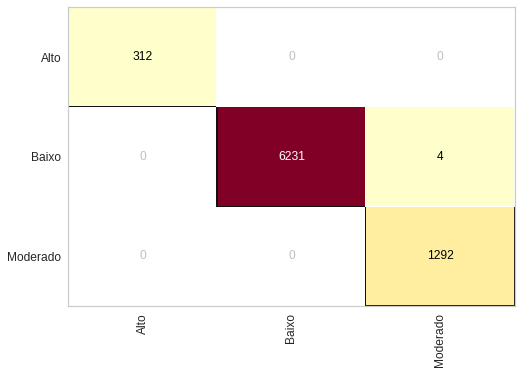

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rna_consumo)
cm.fit(x_consumo_treinamento, y_consumo_treinamento)
cm.score(x_consumo_teste, y_consumo_teste)

In [ ]:
print(classification_report(y_consumo_teste, previsoes_rna))

              precision    recall  f1-score   support

        Alto       1.00      1.00      1.00       312
       Baixo       1.00      1.00      1.00      6235
    Moderado       1.00      1.00      1.00      1292

    accuracy                           1.00      7839
   macro avg       1.00      1.00      1.00      7839
weighted avg       1.00      1.00      1.00      7839



#SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_consumo = SVC(kernel='linear', random_state=1)
svm_consumo.fit(x_consumo_treinamento, y_consumo_treinamento)

SVC(kernel='linear', random_state=1)

In [ ]:
previsoes_svm = svm_consumo.predict(x_consumo_teste)
previsoes_svm

array(['Baixo', 'Moderado', 'Baixo', ..., 'Baixo', 'Baixo', 'Baixo'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_consumo_teste, previsoes_svm)

0.9983416252072969

0.9983416252072969

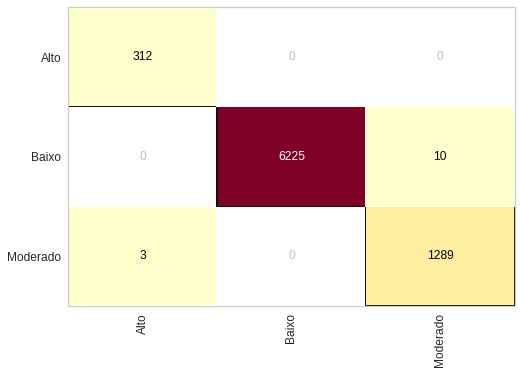

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_consumo)
cm.fit(x_consumo_treinamento, y_consumo_treinamento)
cm.score(x_consumo_teste, y_consumo_teste)

In [ ]:
print(classification_report(y_consumo_teste, previsoes_svm))

              precision    recall  f1-score   support

        Alto       0.99      1.00      1.00       312
       Baixo       1.00      1.00      1.00      6235
    Moderado       0.99      1.00      0.99      1292

    accuracy                           1.00      7839
   macro avg       0.99      1.00      1.00      7839
weighted avg       1.00      1.00      1.00      7839



#Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_consumo = LogisticRegression(random_state = 1) 
logistic_consumo.fit(x_consumo_treinamento, y_consumo_treinamento)

LogisticRegression(random_state=1)

In [ ]:
previsoes_logistic = logistic_consumo.predict(x_consumo_teste)
previsoes_logistic

array(['Baixo', 'Moderado', 'Baixo', ..., 'Baixo', 'Baixo', 'Baixo'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_consumo_teste, previsoes_logistic)

0.9982140579155504

0.9982140579155504

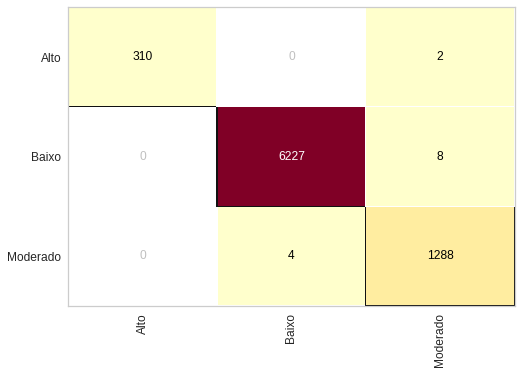

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_consumo)
cm.fit(x_consumo_treinamento, y_consumo_treinamento)
cm.score(x_consumo_teste, y_consumo_teste)

In [ ]:
print(classification_report(y_consumo_teste, previsoes_logistic))

              precision    recall  f1-score   support

        Alto       1.00      0.99      1.00       312
       Baixo       1.00      1.00      1.00      6235
    Moderado       0.99      1.00      0.99      1292

    accuracy                           1.00      7839
   macro avg       1.00      1.00      1.00      7839
weighted avg       1.00      1.00      1.00      7839



#Tuning dos parâmetros

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parametros_rna = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd']}

In [ ]:
grid_search = GridSearchCV(estimator=MLPClassifier(max_iter=1000, hidden_layer_sizes=(3,3), tol=0.00001), param_grid=parametros_rna)
grid_search.fit(x_consumo, y_consumo)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

In [ ]:
parametros_svc = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [ ]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros_svc)
grid_search.fit(x_consumo, y_consumo)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

In [ ]:
parametros_logistic = {'tol': [0.0001, 0.00001, 0.000001], 
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [ ]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros_logistic)
grid_search.fit(x_consumo, y_consumo) 
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

#Validação cruzada

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
resultados_naive = []
resultados_rna = []
resultados_svm = []
resultados_logistic = []

for i in range(30): 
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i) 

  naive = GaussianNB()
  scores = cross_val_score(naive, x_consumo_treinamento, y_consumo_treinamento, cv = kfold)
  resultados_naive.append(scores.mean())

  logistic = LogisticRegression(random_state = 1)
  scores = cross_val_score(logistic, x_consumo_treinamento, y_consumo_treinamento, cv = kfold)
  resultados_logistic.append(scores.mean())

  svm = SVC(kernel='linear', random_state=1)
  scores = cross_val_score(svm, x_consumo_treinamento, y_consumo_treinamento, cv = kfold)
  resultados_svm.append(scores.mean())

  rede_neural = MLPClassifier(activation='relu', solver='adam', max_iter=1000, hidden_layer_sizes=(3,3),tol=0.00001)
  scores = cross_val_score(rede_neural, x_consumo_treinamento, y_consumo_treinamento, cv = kfold)
  resultados_rna.append(scores.mean())

In [ ]:
resultados = pd.DataFrame({'Naive Bayes': resultados_naive, 'Logistica': resultados_logistic,
                           'SVM': resultados_svm, 'Rede neural': resultados_rna})
resultados

,Naive Bayes,Logistica,SVM,Rede neural
0,0.976230,0.997704,0.997449,0.958886
1,0.976400,0.997746,0.997278,0.999490
2,0.976230,0.997661,0.997279,0.978912
3,0.976315,0.997874,0.997194,0.995961
4,0.976358,0.997789,0.997364,0.999702
5,0.976145,0.997704,0.997491,0.999575
6,0.976230,0.997916,0.997491,0.999192
7,0.976315,0.997789,0.997576,0.996386
8,0.976187,0.997576,0.997194,0.978784
9,0.976358,0.997661,0.997491,0.999745


In [ ]:
resultados.describe() 

,Naive Bayes,Logistica,SVM,Rede neural
count,10.000000,10.000000,10.000000,10.000000
mean,0.976277,0.997742,0.997381,0.990663
std,0.000084,0.000103,0.000138,0.013921
min,0.976145,0.997576,0.997194,0.958886
25%,0.976230,0.997672,0.997278,0.983174
50%,0.976273,0.997725,0.997406,0.997789
75%,0.976347,0.997789,0.997491,0.999554
max,0.976400,0.997916,0.997576,0.999745
